<a href="https://colab.research.google.com/github/sjana01/m2pi2021/blob/main/car_pricing_live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://m2pi.syzygy.ca/data/CarPrice_Assignment_orig.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
# index column, categorical variables
# I'll treat carname, doornumber, and cylindernumber specially
cat = ["symboling", "fueltype", "aspiration",
       "carbody", "drivewheel", "enginelocation",
       "enginetype", "fuelsystem"]

df = pd.read_csv("https://m2pi.syzygy.ca/data/CarPrice_Assignment_orig.csv",
                 index_col="car_ID",
                 dtype={c: "category" for c in cat})
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    category
 1   CarName           205 non-null    object  
 2   fueltype          205 non-null    category
 3   aspiration        205 non-null    category
 4   doornumber        205 non-null    object  
 5   carbody           205 non-null    category
 6   drivewheel        205 non-null    category
 7   enginelocation    205 non-null    category
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    category
 14  cylindernumber    205 non-null    object  
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

In [ ]:
for c in cat:
  categories = df[c].dtype.categories
  print(c, len(categories), list(categories))

symboling 6 ['-1', '-2', '0', '1', '2', '3']
fueltype 2 ['diesel', 'gas']
aspiration 2 ['std', 'turbo']
carbody 5 ['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon']
drivewheel 3 ['4wd', 'fwd', 'rwd']
enginelocation 2 ['front', 'rear']
enginetype 7 ['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor']
fuelsystem 8 ['1bbl', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi']


In [ ]:
# car brands
df["brand"] = df.CarName.apply(lambda s: s.lower().split(" ")[0])
df.drop(columns=["CarName"], inplace=True)

In [ ]:
df.brand.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
replacements = {
    "maxda": "mazda",
    "porcshce": "porsche",
    "vw": "volkswagen",
    "vokswagen": "volkswagen",
    "toyouta": "toyota"}
df.brand = df.brand.replace(replacements)
print(df.brand.unique())
df.brand = df.brand.astype("category")

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [ ]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [ ]:
df.cylindernumber = pd.Categorical(
    df.cylindernumber, 
    ordered=True, 
    categories=["two", "three", "four", "five", "six", "eight", "twelve"]
)
df.cylindernumber = df.cylindernumber.cat.codes

In [ ]:
df.cylindernumber.dtype

dtype('int8')

In [ ]:
df.doornumber = pd.Categorical(
    df.doornumber, 
    ordered=True, 
    categories=["two", "four"]
)
df.doornumber = df.doornumber.cat.codes

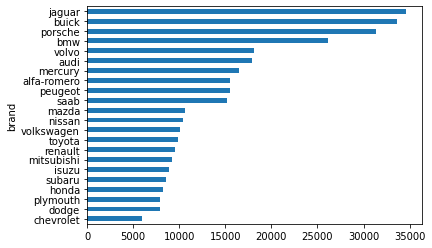

In [ ]:
brands = df.groupby("brand").mean().sort_values(by="price")
brands.price.plot(kind="barh")

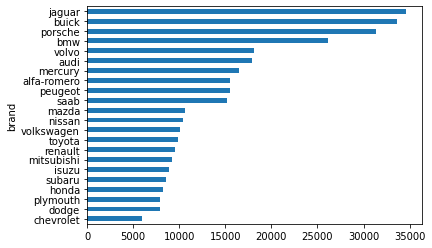

In [ ]:
brands = df.groupby("brand").mean().sort_values(by="price")
brands.price.plot(kind="barh")

In [ ]:
df_dummies = pd.get_dummies(df)
df_dummies

,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,symboling_-1,symboling_-2,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_alfa-romero,brand_audi,brand_bmw,brand_buick,brand_chevrolet,brand_dodge,brand_honda,brand_isuzu,brand_jaguar,brand_mazda,brand_mercury,brand_mitsubishi,brand_nissan,brand_peugeot,brand_plymouth,brand_porsche,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_volkswagen,brand_volvo
car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,13495.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,88.6,168.8,64.1,48.8,2548,2,130,3.47,2.68,9.0,111,5000,21,27,16500.0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,94.5,171.2,65.5,52.4,2823,4,152,2.68,3.47,9.0,154,5000,19,26,16500.0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,99.8,176.6,66.2,54.3,2337,2,109,3.19,3.40,10.0,102,5500,24,30,13950.0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,99.4,176.6,66.4,54.3,2824,3,136,3.19,3.40,8.0,115,5500,18,22,17450.0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,1,109.1,188.8,68.9,55.5,2952,2,141,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202,1,109.1,188.8,68.8,55.5,3049,2,141,3.78,3.15,8.7,160,5300,19,25,19045.0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
203,1,109.1,188.8,68.9,55.5,3012,4,173,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.cylindernumber.cat.codes.unique()

array([2, 4, 3, 1, 6, 0, 5], dtype=int8)

In [ ]:
df.cylindernumber

car_ID
1      four
2      four
3       six
4      four
5      five
       ... 
201    four
202    four
203     six
204     six
205    four
Name: cylindernumber, Length: 205, dtype: category
Categories (7, object): ['two' < 'three' < 'four' < 'five' < 'six' < 'eight' < 'twelve']

In [ ]:
df.cylindernumber.cat.codes

car_ID
1      2
2      2
3      4
4      2
5      3
      ..
201    2
202    2
203    4
204    4
205    2
Length: 205, dtype: int8